In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path.append('..')
from MPRA_exp.utils import *

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [2]:
def change_config(load_dir, save_dir, key, value):
    with open(load_dir, 'r') as f:
        # config = yaml.safe_load(f)
        config = yaml.load(f, Loader=yaml.FullLoader)
        config[key] = value

    if save_dir is not None:
        with open(save_dir, 'w') as f:
            yaml.dump(config, f)

In [3]:
python_path = 'train_0424_valid.py'
saved_dir = 'saved/0425_cls/0424_142353'
config_path = f'{saved_dir}/config.yaml'

In [4]:
config_path_valid = config_path.replace('config.yaml', 'config_valid.yaml')
change_config(config_path, config_path_valid, 'selected_valid_datasets_idx', [0,1,2,3])

In [5]:
subprocess.run(
    f'export OMP_NUM_THREADS=4 ;'
    f'export CUDA_VISIBLE_DEVICES=0 ;'
    f'torchrun --nproc_per_node=1 --master_port=23456 {python_path} --config_path {config_path_valid}', 
    shell=True)

2024-04-26 02:37:11,836 - INFO - Start DDP on rank 0, cuda cuda:0.
2024-04-26 02:37:11,836 - INFO - selected_train_datasets_idx = [2, 3]
2024-04-26 02:37:11,836 - INFO - selected_valid_datasets_idx = [0, 1, 2, 3]
2024-04-26 02:37:50,693 - INFO - len(train_dataset) = [357691, 357691]
2024-04-26 02:37:50,694 - INFO - len(valid_dataset) = [112253, 112253, 37681, 37681]
2024-04-26 02:37:50,694 - INFO - len(train_loader) = 698
2024-04-26 02:37:50,694 - INFO - len(valid_loader) = 146
2024-04-26 02:37:51,171 - INFO - load saved model from saved/0425_cls/0424_142353/checkpoints/checkpoint_0.589135.pt
2024-04-26 02:37:52,889 - INFO - ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
DistributedDataParallel                  [1024]                    --
├─MyCNNTransformerMultiTask: 1-1         [1024]                    --
│    └─Embedding: 2-1                    [1024, 1, 256]      

100%|██████████| 290/290 [00:48<00:00,  5.98it/s]


2024-04-26 02:38:43,224 - INFO - local_rank = 0, epoch =   0, valid_loss = 0.672925
2024-04-26 02:38:43,392 - INFO - task_name = ATAC_HepG2, loss = 0.706218, Accuracy = 0.614840, AUROC = 0.706606
2024-04-26 02:38:43,449 - INFO - task_name = ATAC_K562 , loss = 0.694927, Accuracy = 0.598257, AUROC = 0.619340
2024-04-26 02:38:43,467 - INFO - task_name = MPRA_HepG2, loss = 0.589583, Accuracy = 0.686713, AUROC = 0.763142
2024-04-26 02:38:43,484 - INFO - task_name = MPRA_K562 , loss = 0.588848, Accuracy = 0.686306, AUROC = 0.751795
2024-04-26 02:38:43,490 - INFO - local_rank = 0, finish training.


CompletedProcess(args='export OMP_NUM_THREADS=4 ;export CUDA_VISIBLE_DEVICES=0 ;torchrun --nproc_per_node=1 --master_port=23456 train_0424_valid.py --config_path saved/0425_cls/0424_142353/config_valid.yaml', returncode=0)

In [6]:
task_idx_list = np.load(f'{saved_dir}/task_idx_list.npy')
y_pred_list = np.load(f'{saved_dir}/y_pred_list.npy')
y_true_list = np.load(f'{saved_dir}/y_true_list.npy')
print(task_idx_list.shape, y_pred_list.shape, y_true_list.shape)

(296960,) (296960,) (296960,)


In [7]:
y_pred_0 = y_pred_list[np.where(task_idx_list==0)]
y_true_0 = y_true_list[np.where(task_idx_list==0)]
y_pred_1 = y_pred_list[np.where(task_idx_list==1)]
y_true_1 = y_true_list[np.where(task_idx_list==1)]
print(len(y_pred_0), len(y_true_0), len(y_pred_1), len(y_true_1))

y_pred_2 = y_pred_list[np.where(task_idx_list==2)]
y_true_2 = y_true_list[np.where(task_idx_list==2)]
y_pred_3 = y_pred_list[np.where(task_idx_list==3)]
y_true_3 = y_true_list[np.where(task_idx_list==3)]

print(len(y_pred_2), len(y_true_2), len(y_pred_3), len(y_true_3))

111616 111616 111616 111616
36864 36864 36864 36864


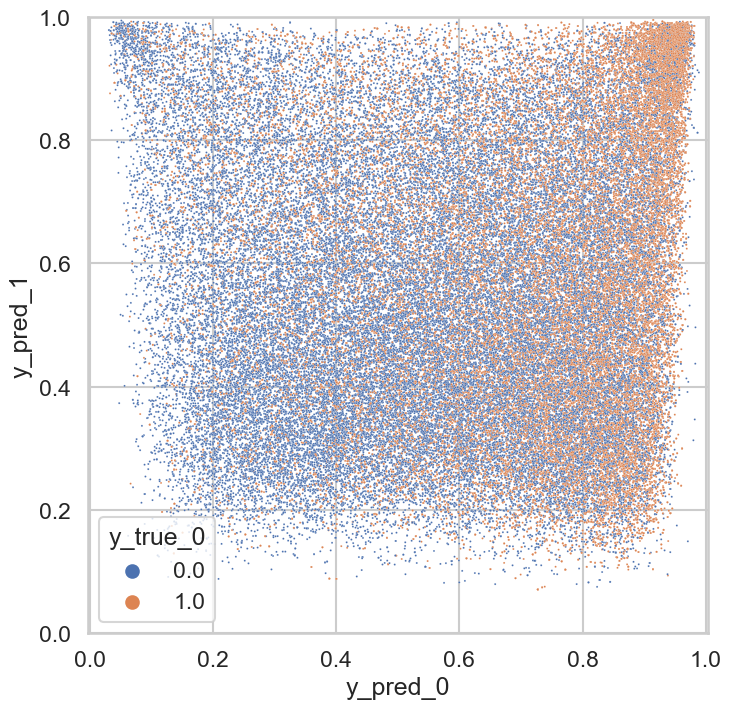

PearsonRResult(statistic=0.08481632889094114, pvalue=2.916757181934556e-177)


In [8]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_0)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_0')
plt.savefig('figures/1.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

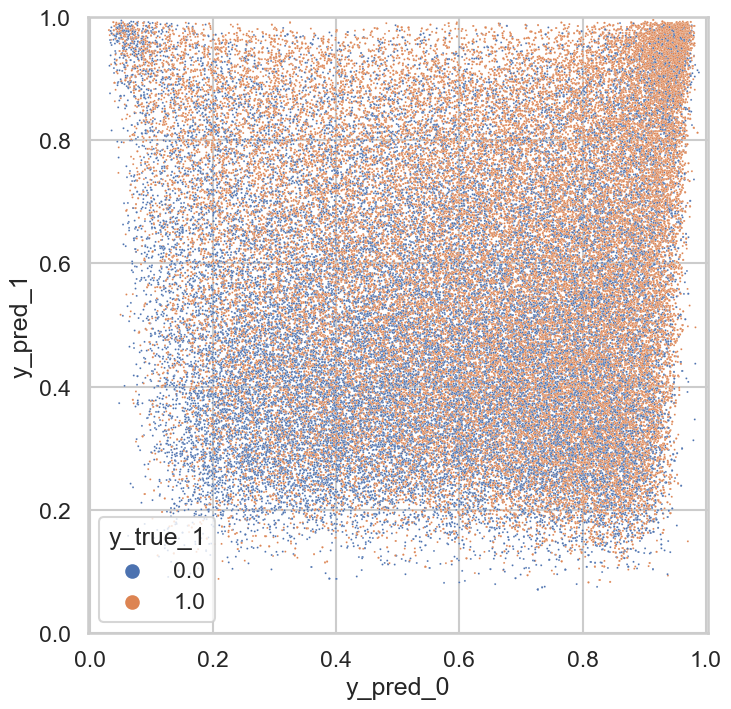

PearsonRResult(statistic=0.08481632889094114, pvalue=2.916757181934556e-177)


In [9]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_1)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_1')
plt.savefig('figures/2.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

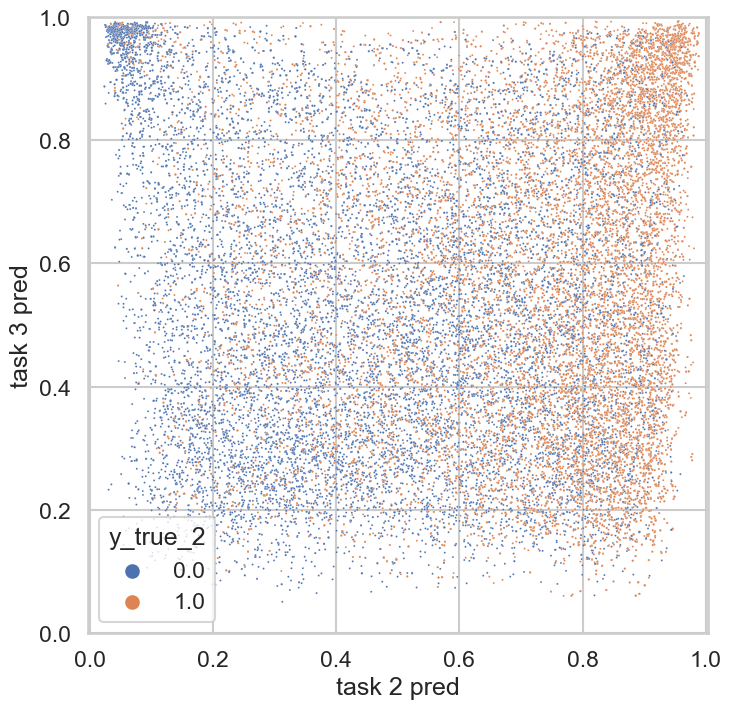

PearsonRResult(statistic=-0.05080649545411446, pvalue=1.658090513603906e-22)


In [10]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_2)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_2')
plt.savefig('figures/3.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

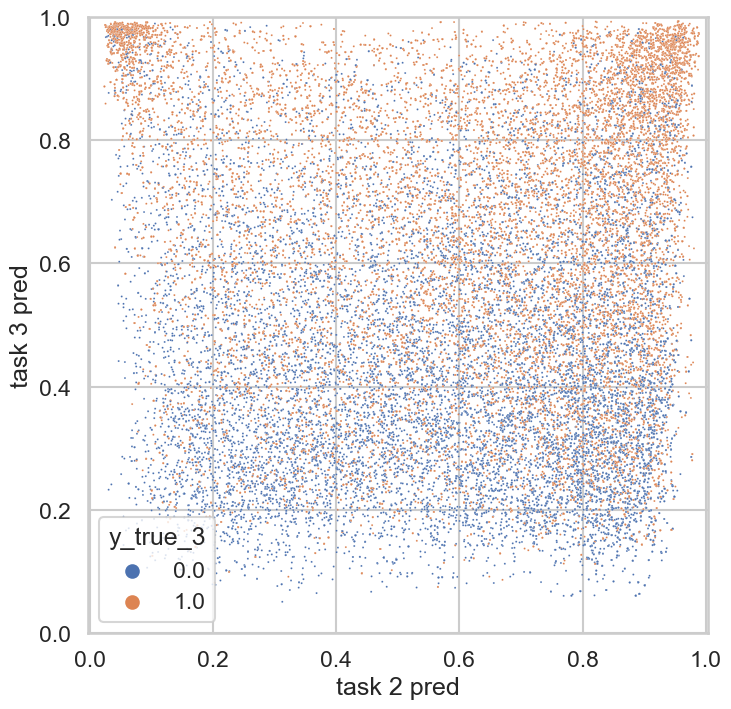

PearsonRResult(statistic=-0.05080649545411446, pvalue=1.658090513603906e-22)


In [11]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_3)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_3')
plt.savefig('figures/4.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

In [22]:
print(confusion_matrix(y_true_0, y_true_1))
print(confusion_matrix(y_pred_0>0.5, y_pred_1>0.5))

print(confusion_matrix(y_true_2, y_true_3))
print(confusion_matrix(y_pred_2>0.5, y_pred_3>0.5))

[[21798 38132]
 [21556 30767]]
[[35259 20091]
 [12412 44491]]
[[ 6978 10265]
 [ 9937 10501]]
[[17243  2367]
 [ 2174 15897]]


In [12]:
print(classification_report(y_true_0, y_pred_0>0.5))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     59930
         1.0       0.68      0.74      0.71     52323

    accuracy                           0.71    112253
   macro avg       0.71      0.72      0.71    112253
weighted avg       0.72      0.71      0.71    112253



In [13]:
print(classification_report(y_true_1, y_pred_1>0.5))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60     43354
         1.0       0.75      0.70      0.73     68899

    accuracy                           0.67    112253
   macro avg       0.66      0.67      0.66    112253
weighted avg       0.68      0.67      0.68    112253



In [14]:
print(classification_report(y_true_2, y_pred_2>0.5))

              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69     17243
         1.0       0.75      0.66      0.70     20438

    accuracy                           0.69     37681
   macro avg       0.70      0.70      0.69     37681
weighted avg       0.70      0.69      0.69     37681



In [15]:
print(classification_report(y_true_3, y_pred_3>0.5))

              precision    recall  f1-score   support

         0.0       0.48      0.55      0.51     16915
         1.0       0.58      0.51      0.55     20766

    accuracy                           0.53     37681
   macro avg       0.53      0.53      0.53     37681
weighted avg       0.54      0.53      0.53     37681

